#  Spam or Ham?

# Index

- [1 Introduction](#1)
- [2 Reading the Data](#2)
- [3 So hows this going down..No Byes?!...No, naive Bayes!](#3)
- [4 Training Wheels for Data - Training Set](#4)
- [5 Vocabulary](#5)
- [6 Probability of Probable Words](#6)
- [7 Ham or Spam](#7)
- [8 Not 100%! Why Not?](#8)
- [9 Conclusion](#9)
- [10 Acknowledgement](#10)

# 1

## Introduction

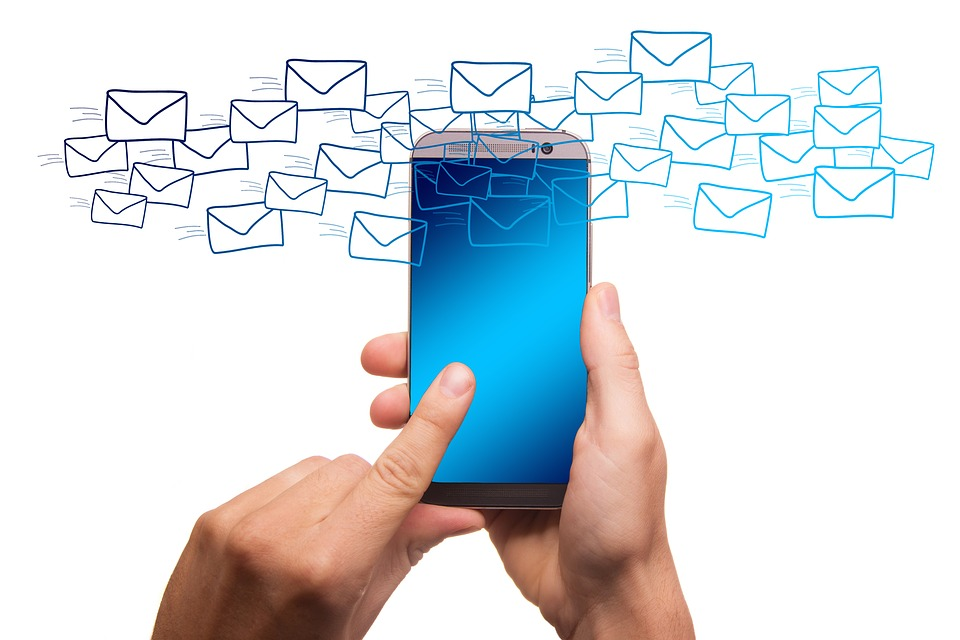

SMS spamming is an annoyance and in some cases can becomes a security issue. It becomes a security issue when phone users actively attend to the links or the directions provided in the spam message. 

Identifying such messages can be a challenge especially because the system may be unaware of the difference between valid and spam messages.

The goal of this project is to create an algorithim that should help to identify spam messages among legitimate ones.

[Index](#Index)

# 2

## Reading the Data

The data to be analysed is provided by Tiago A. Almeida and José María Gómez Hidalgo, and it can be downloaded from [here](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection). The data was collected from various sources. The sources include a now defunct site called Grumbletext, the Department of Computer Science at the National University of Singapore, SMS messages used for Caroline Tag's PhD thesis etc. More details related to these sources are available [here](https://www.dt.fee.unicamp.br/~tiago/smsspamcollection/#composition).

We shall move forward with first reading the data and analysing the same.

In [1]:
# Read the file
import pandas as pd
data = pd.read_csv('SMSSpamCollection',sep='\t',header=None,names=['Label','SMS'])
data.shape

(5572, 2)

In [2]:
data.head(3)

Label                                                SMS
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...

The data is straightforward and essentially contains the message and the identification of whether it is ham or spam. Ham identifies messages that are not spam.

In [3]:
print('\033[1m Percentages of Ham and Spam messages in the data')
data['Label'].value_counts(normalize=True)*100

 Percentages of Ham and Spam messages in the data


ham     86.593683
spam    13.406317
Name: Label, dtype: float64

[Index](#Index)

# 3

## So hows this going down..No Byes?!...No, naive Bayes!
**Understanding Naive Bayes Classification**

The naive Bayes Classification is based on the [Bayes Theorem](https://www.mathsisfun.com/data/bayes-theorem.html) which stems from the idea of [Conditional Probability](https://www.mathsisfun.com/data/probability-events-conditional.html).

The idea behind Conditional Probability is that the probability of a dependent event A can change based on the dependee event B having already happened. e.g Normally the probability of rolling a 5 on a fair 6 sided die would be 1/6. However, assume the 6 sided die was rolled and it was declared that the outcome of the event is an odd number. The probability that a 5 was rolled becomes 1/3 because we know that an odd number was rolled.

Based on Conditional Probability the principle working behind [naive Bayes Classification](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) for Spam Detection is as follows:

Empirical data can reveal the probability of spam and ham messages. After creating a vocabulary of words associated to ham and spam messages from the existing dataset, we can calculate the probability of those words appearing in those respective message types. The probability of spam messages coming in and they having words associated to spam are the dependent conditions, the same holds for ham messages and its related words.

Armed with these probabilities and combining them during the assessment of a new message, we can identify the degree by which they are associated to spam or ham messages.

If a message should appear with words that do not exist in our current dataset, they are ignored and probabilities are determined using the known words.

The word *naive* is associated to this classification because when calculating the probabilities, it is assumed that the words in the message are independent of each other. The words 'good dog' are treated individually as words 'good' and 'dog' their combined meaning is not taken in to consideration. This assumption that there is no relationship between the words is what makes it a *naive* algorithim.

[Index](#Index)

# 4

## Training Wheels for Data - Training Set
**Generating a Training Set and Test Set from the data provided**

Now that we have had a quick understanding of the methodology we can get on with creating the training set and test set for the data. The training set is what will be used the generate the probabilites of spam and ham words in spam and ham messages respectively. 

The dataset already identifies each message as ham or spam. Using the test set we will be verifying whether the algorithim can output those same classifications.

We shall create the training set and test set by first randomizing the data (redistributing the rows) and then selecting 80% of the randomized data as the training set and the remaining 20% as the test set.

In [4]:
#Randomize the data
randomized=data.sample(frac=1,random_state=1)

#Generate training set and test set
train_set = randomized[:round(len(randomized) * 0.8)].reset_index(drop=True)
test_set = randomized[round(len(randomized) * 0.8):].reset_index(drop=True)

[Index](#Index)

# 5

## Vocabulary
**Generating a vocabulary  from the words in the dataset**

Finding the probability of spam and ham words requires the generation of a vocabulary of all the words that are in the training set. Following the generation of this vocabulary, we can count the number of times each of these words are present in the training set which will later help in identifying their probabilities in spam and ham messages.

In [5]:
train_set.head(3)

Label                                            SMS
0   ham                   Yep, by the pretty sculpture
1   ham  Yes, princess. Are you going to make me moan?
2   ham                     Welp apparently he retired

It was noted during the analysis that each message not only contains words but also punctuations. In order to make analysis easier we shall isolate the words and remove any punctuations. In addition we shall be changing all the words to lower case so that the same words with different cases in the text be treated similarly. e.g. LOWER, Lower and lower will all become lower. This is to ensure that analysis becomes faster.

In [6]:
#Isolate and save only words
train_set['SMS']=train_set['SMS'].str.replace('\W',' ',regex=True).str.lower()
train_set['SMS'].head(3)

0                     yep  by the pretty sculpture
1    yes  princess  are you going to make me moan 
2                       welp apparently he retired
Name: SMS, dtype: object

In [7]:
#Generate the vocabulary
train_set['SMS'] = train_set['SMS'].str.split()
vocabulary = []
for each_message in train_set['SMS']:
    for each_word in each_message:
        vocabulary.append(each_word)
vocabulary = list(set(vocabulary))

In [8]:
#Count the number of times words in the vocabulary appear in the messages
word_counts_per_sms = {unique_word: [0] * len(train_set['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(train_set['SMS']):
    for word in sms:
        word_counts_per_sms[word][index] += 1
        
word_count = pd.DataFrame(word_counts_per_sms)
word_count.head(5)

moji  mental  outreach  anyone  prepare  openin  hmv1  appear  definite  \
0     0       0         0       0        0       0     0       0         0   
1     0       0         0       0        0       0     0       0         0   
2     0       0         0       0        0       0     0       0         0   
3     0       0         0       0        0       0     0       0         0   
4     0       0         0       0        0       0     0       0         0   

   premium  ...  gbp4  no1  reply  fifth  station  09066362220  2mrw  \
0        0  ...     0    0      0      0        0            0     0   
1        0  ...     0    0      0      0        0            0     0   
2        0  ...     0    0      0      0        0            0     0   
3        0  ...     0    0      0      0        0            0     0   
4        0  ...     0    0      0      0        0            0     0   

   barkleys  simonwatson5120  inside  
0         0                0       0  
1         0                0       0  
2         0                0       0  
3         0                0       0  
4         0                0       0  

[5 rows x 7783 columns]

Since we have the word count of each word in every SMS, it would be sensible to display the same alongside the SMS for better analysis.

In [9]:
new_train_set = pd.concat([train_set,word_count],axis=1)
new_train_set.head(5)

Label                                                SMS  moji  mental  \
0   ham                  [yep, by, the, pretty, sculpture]     0       0   
1   ham  [yes, princess, are, you, going, to, make, me,...     0       0   
2   ham                    [welp, apparently, he, retired]     0       0   
3   ham                                           [havent]     0       0   
4   ham  [i, forgot, 2, ask, ü, all, smth, there, s, a,...     0       0   

   outreach  anyone  prepare  openin  hmv1  appear  ...  gbp4  no1  reply  \
0         0       0        0       0     0       0  ...     0    0      0   
1         0       0        0       0     0       0  ...     0    0      0   
2         0       0        0       0     0       0  ...     0    0      0   
3         0       0        0       0     0       0  ...     0    0      0   
4         0       0        0       0     0       0  ...     0    0      0   

   fifth  station  09066362220  2mrw  barkleys  simonwatson5120  inside  
0      0        0            0     0         0                0       0  
1      0        0            0     0         0                0       0  
2      0        0            0     0         0                0       0  
3      0        0            0     0         0                0       0  
4      0        0            0     0         0                0       0  

[5 rows x 7785 columns]

[Index](#Index)

# 6

## Probability of Probable Words
**Calculating the probabaility of words in the vocabulary appearing in ham and spam messages**

The naive Bayes Classification for Spam Detection is based on the following formulae:

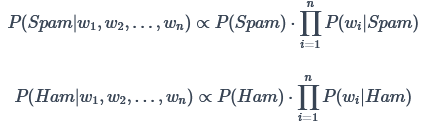
*Source*:[Dataquest.io](https://app.dataquest.io/c/74/m/432/the-naive-bayes-algorithm/12/next-steps)

As mentioned earlier, the probabilities are being calculated to determine based on the combination of the probability of the words in the message and the probability of the message itself being ham or spam. However in order to calculate this we need to find the probability of ham and spam messages in the dataset and then the probability of the words appearing in those messages. 

The next formula will aid in determining the probability of the words appearing in a message depending on whether they are ham or spam messages.

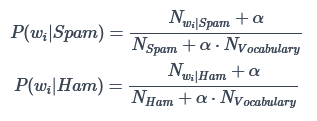

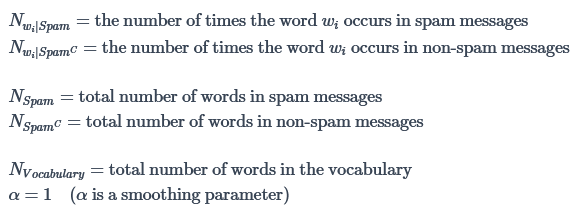
*Source*:[Dataquest.io](https://app.dataquest.io/c/74/m/432/the-naive-bayes-algorithm/12/next-steps)

We can directly calculate p(ham), p(spam), N<sub>Spam</sub>, N<sub>Spam<sup>C</sup></sub> and N<sub>Vocabulary</sub>. α is the smoothing parameter that will be used for [additive smoothing](https://en.wikipedia.org/wiki/Additive_smoothing)

In [10]:
# Identifying spam and ham messages
spam_messages = new_train_set[new_train_set['Label'] == 'spam']
ham_messages = new_train_set[new_train_set['Label'] == 'ham']

# P(Spam) and P(Ham)Probability of spam and ham messages 
p_spam = len(spam_messages) / len(new_train_set)          
p_ham = len(ham_messages) / len(new_train_set)           

# Total number of words (non-unique) that make up all spam messages
n_words_per_spam_message = spam_messages['SMS'].apply(len)
n_spam = n_words_per_spam_message.sum()

# Total number of words (non-unique) that make up all ham messages
n_words_per_ham_message = ham_messages['SMS'].apply(len)
n_ham = n_words_per_ham_message.sum()

# Total words in the vocabulary
n_vocabulary = len(vocabulary)

# Laplace smoothing
alpha = 1

Now that we have the necessary values we can proceed to calculate the probability of each word appearing in spam or ham message and store them separately.

In [11]:
# Initiate parameters
param_ham = {}
param_spam = {}
for each_word in vocabulary:
    param_ham[each_word]=0
    param_spam[each_word]=0

# Calculate parameters
for word in vocabulary:
    n_word_given_spam = spam_messages[word].sum()
    p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
    param_spam[word] = p_word_given_spam
    
    n_word_given_ham = ham_messages[word].sum()
    p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
    param_ham[word] = p_word_given_ham

[Index](#Index)

# 7

## Ham or Spam
**Identifying Spam SMS from the Training Set**

Now that we have all the necessary values required for calculation, we can break down a message and calculate the probability of it being ham and spam. If the probability of it being ham is greater than scam we can classify it as ham.

In [12]:
import re

def classify(message):
    """
    Flags a message as ham or spam
    
    Args:
    message (string): Message that must be processed
    """
    message = re.sub('\W', ' ', message)
    message = message.lower()
    message = message.split()

    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    
    #Calculate probabilites based on the first formula above
    for word in message:
        if word in param_ham:
            p_ham_given_message*=param_ham[word]
        if word in param_spam:
            p_spam_given_message*=param_spam[word]
  
    print('P(Spam|message):', p_spam_given_message)
    print('P(Ham|message):', p_ham_given_message)

    if p_ham_given_message > p_spam_given_message:
        print('Label: Ham')
    elif p_ham_given_message < p_spam_given_message:
        print('Label: Spam')
    else:
        print('Equal proabilities, have a human classify this!')

In [13]:
classify('WINNER!! This is the secret code to unlock the money: C3421.')

P(Spam|message): 1.3481290211300841e-25
P(Ham|message): 1.9368049028589875e-27
Label: Spam


In [14]:
classify("Sounds good, Tom, then see u there")

P(Spam|message): 2.4372375665888117e-25
P(Ham|message): 3.687530435009238e-21
Label: Ham


Now that we can identify ham and spam we could run the same against our test set to determine how many are correctly identified as ham and spam.

In [15]:
import re

def classify_test(message):
    """
    Flags a message as ham or spam
    
    Args:
    message (string): Message that must be processed
    
    Returns:
    (string): Classification as 'ham', 'spam' or 'needs human classification' 
    """
    message = re.sub('\W', ' ', message)
    message = message.lower()
    message = message.split()

    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    
    for word in message:
        if word in param_ham:
            p_ham_given_message*=param_ham[word]
        if word in param_spam:
            p_spam_given_message*=param_spam[word]

    if p_ham_given_message > p_spam_given_message:
        return 'ham'
    elif p_spam_given_message > p_ham_given_message:
        return 'spam'
    else:
        return 'needs human classification'

In [16]:
test_set['predicted'] = test_set['SMS'].apply(classify_test)
test_set.head()

Label                                                SMS predicted
0   ham          Later i guess. I needa do mcat study too.       ham
1   ham             But i haf enuff space got like 4 mb...       ham
2  spam  Had your mobile 10 mths? Update to latest Oran...      spam
3   ham  All sounds good. Fingers . Makes it difficult ...       ham
4   ham  All done, all handed in. Don't know if mega sh...       ham

Now that we have predicted using the algorithim, which SMSs' are ham and spam, we can calculate the efficacy of our algorithim to determine the rate of success by comparing the number of predicted classification versus the actual labels.

In [17]:
correct = 0
total = test_set.shape[0]

print("\033[1m"+"Accuracy"+"\033[0m"+'\n')
for index, row in test_set.iterrows():
    if row['predicted'] == row['Label']:
        correct+=1
print((correct/total)*100)

Accuracy

98.74326750448833


**98.7%** of messages have been correctly identified. This is an excellent success rate and proof that our naive Bayes Classification works well for SMS spam filters.

[Index](#Index)

# 8

## Not 100%! Why Not?
**Assessing the SMS that were not correctly identified**

While our algorithim correctly identified 98.7% of the messages correctly, we need to identify whether the remaining 1.3% failed to be detected because of some anomaly

In [18]:
failed = test_set[test_set['Label']!=test_set['predicted']].copy()

In [19]:
import re

def classify_test_failed(message):
    """
    Identifies the vocabularay occurence and compares the same against the total p_ham and p_spam of each message
    
    Args:
    message (string): Message that must be processed
    
    Returns:
    (series): containing the vocabulary occurence, p_ham and p_spam of each message
    """

    message = re.sub('\W', ' ', message)
    message = message.lower()
    message = message.split()

    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    vocabulary_occurence = 0
    
    for word in message:
        if word in param_ham:
            p_ham_given_message*=param_ham[word]
                     
        if word in param_spam:
            p_spam_given_message*=param_spam[word]
        
        #Check occurence of all words in vocabulary
        if word in vocabulary:
            vocabulary_occurence+=1
    #p_vocabulary = vocabulary_occurence/len(message)
                     
    return pd.Series([vocabulary_occurence,p_ham_given_message,p_spam_given_message],index=['vocabulary_occurence','p_ham','p_spam'])

pd.concat([failed,failed['SMS'].apply(classify_test_failed)],axis=1)

Label                                                SMS  \
114  spam  Not heard from U4 a while. Call me now am here...   
135  spam  More people are dogging in your area now. Call...   
152   ham                  Unlimited texts. Limited minutes.   
159   ham                                       26th OF JULY   
284   ham                             Nokia phone is lovly..   
293   ham  A Boy loved a gal. He propsd bt she didnt mind...   
302   ham                   No calls..messages..missed calls   
319   ham  We have sent JD for Customer Service cum Accou...   
504  spam  Oh my god! I've found your number again! I'm s...   
546  spam  Hi babe its Chloe, how r u? I was smashed on s...   
741  spam  0A$NETWORKS allow companies to bill for SMS, s...   
876  spam           RCT' THNQ Adrian for U text. Rgds Vatian   
885  spam                                      2/2 146tf150p   
953  spam  Hello. We need some posh birds and chaps to us...   

                      predicted  vocabulary_occurence         p_ham  \
114                         ham                  30.0  1.181554e-84   
135                         ham                  26.0  2.035339e-78   
152                        spam                   3.0  1.385268e-12   
159                        spam                   3.0  1.319153e-12   
284                        spam                   3.0  3.341645e-10   
293  needs human classification                  97.0  0.000000e+00   
302                        spam                   5.0  3.030822e-18   
319                        spam                  18.0  1.386787e-60   
504                         ham                  22.0  1.627774e-66   
546                         ham                  32.0  5.839167e-95   
741                         ham                  24.0  9.608184e-69   
876                         ham                   3.0  5.885659e-08   
885                         ham                   2.0  1.415923e-05   
953                         ham                  22.0  2.281984e-61   

            p_spam  
114   1.999536e-94  
135   1.004189e-78  
152   1.054585e-11  
159   5.328430e-12  
284   3.230228e-09  
293   0.000000e+00  
302   9.486266e-18  
319   2.949867e-58  
504   2.637158e-73  
546  4.053603e-100  
741   3.199788e-72  
876   2.089055e-08  
885   7.027356e-06  
953   6.041255e-71

Clearly the messages that were **incorrectly identified by our algorithim failed to do so because many of the words in them are under represented in the messages.** The combination of the lower probability words causes the overall probability of the message to dip. While the probabilities have dipped, slight value differences have caused the classification from going wrong.

[Index](#Index)

# 9

## Conclusion

SMS like any other medium of communication is prone to misuse. Spam SMS is a very common form of misuse. In this project we attempted to come up with an algorithim using naive Bayes Classification to clearly identify spam SMS from ham (not spam).

Using an existing dataset we divided the data in to training set and test set. The data from the training set was used to determine what combination of words constituted spam messages. The test set was later used to test whether the algorithim classified the SMS messages correctly.

After running the test set against the developed algorithim, the system correctly classified 98.7% of the test set. The remaining failed to be classified correctly because many of the words that made up those messages did not exist in the vocabulary of the training set.

[Index](#Index)

# 10

## Acknowledgement

This is a guided project provided by [Dataquest](https://app.dataquest.io/dashboard). The focus of the project was to understand conditional probability and implement the understanding on a real world application.